In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.optimizers import Adam
from keras.applications import InceptionV3
from keras.applications import ResNet50, ResNet152, ResNet101
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras import layers
import keras

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

Using TensorFlow backend.


In [2]:
img = image.load_img('../../dataset/data/train/korean flag/000001 (2).jpg')

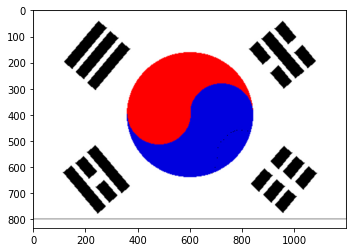

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('../../dataset/data/train/korean flag/000001 (2).jpg').shape

(833, 1200, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
val =ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('../../dataset/data/train/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

val_dataset = train.flow_from_directory('../../dataset/data/val/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

Found 1012 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'korean flag': 0, 'no korean flag': 1}

In [8]:
stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')
save = ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

In [9]:
fit_list = []

## model1 resnet152

In [10]:
res152 = ResNet152(include_top=True, weights='imagenet')

for layer in res152.layers:
    layer.trainable=False

In [11]:
x = res152.output # param num= 2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model1 = tf.keras.Model(res152.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
save = ModelCheckpoint('./resnet152.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model1.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= Adam(lr=0.001), metrics=['accuracy'])

model_fit1 = model1.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 1000,
                      validation_data=val_dataset,
                      callbacks=[stop, save, reduce_lr])

fit_list.append(model_fit1)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 20s 978ms/step - loss: 0.6203 - accuracy: 0.6895 - val_loss: 0.6803 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 2/1000
20/20 [==============================] - 18s 879ms/step - loss: 0.5794 - accuracy: 0.6975 - val_loss: 0.6478 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 3/1000
20/20 [==============================] - 14s 706ms/step - loss: 0.5730 - accuracy: 0.6959 - val_loss: 0.6634 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 4/1000
20/20 [==============================] - 15s 761ms/step - loss: 0.5627 - accuracy: 0.7188 - val_loss: 0.6641 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 5/1000
20/20 [==============================] - 19s 939ms/step - loss: 0.5423 - accuracy: 0.7094 - val_loss: 0.6441 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 6/1000
20/20 [==============================] - 15s 740ms/step - loss: 0.5395 - accuracy: 0.7150 - val_loss: 0.6529 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 7/1000
20/20 [==============================] - 15s 736ms/s

## resnet 101

In [13]:
res101 = ResNet101(include_top=True, weights='imagenet')

for layer in res101.layers:
    layer.trainable=False

In [14]:
x = res101.output # param num= 2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model4 = tf.keras.Model(res101.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [15]:
save = ModelCheckpoint('./resnet101.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model4.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= Adam(lr=0.001), metrics=['accuracy'])

model_fit4 = model4.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 1000,
                      validation_data=val_dataset,
                      callbacks=[stop, save, reduce_lr])

fit_list.append(model_fit4)

Epoch 1/1000
20/20 [==============================] - 19s 932ms/step - loss: 0.6419 - accuracy: 0.6656 - val_loss: 0.6615 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 2/1000
20/20 [==============================] - 15s 759ms/step - loss: 0.6134 - accuracy: 0.6704 - val_loss: 0.6673 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 3/1000
20/20 [==============================] - 16s 792ms/step - loss: 0.5926 - accuracy: 0.6879 - val_loss: 0.6485 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 4/1000
20/20 [==============================] - 15s 734ms/step - loss: 0.5852 - accuracy: 0.7047 - val_loss: 0.6595 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 5/1000
20/20 [==============================] - 15s 756ms/step - loss: 0.5842 - accuracy: 0.6891 - val_loss: 0.6499 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 6/1000
20/20 [==============================] - 14s 709ms/step - loss: 0.5738 - accuracy: 0.6975 - val_loss: 0.6525 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 7/1000
20/20 [==============================] 

## model2 resnet50

In [16]:
res50 = ResNet50(include_top=True, weights='imagenet')

for layer in res50.layers:
    layer.trainable=False

In [17]:
x = res50.output # param num= 2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(res50.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
save = ModelCheckpoint('./resnet50.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model2.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= Adam(lr=0.001), metrics=['accuracy'])

model_fit2 = model2.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 1000,
                      validation_data=val_dataset,
                      callbacks=[stop, save, reduce_lr])

fit_list.append(model_fit2)

Epoch 1/1000
20/20 [==============================] - 16s 807ms/step - loss: 0.6482 - accuracy: 0.6338 - val_loss: 0.6562 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 2/1000
20/20 [==============================] - 15s 750ms/step - loss: 0.6075 - accuracy: 0.6943 - val_loss: 0.6502 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 3/1000
20/20 [==============================] - 16s 822ms/step - loss: 0.5924 - accuracy: 0.6959 - val_loss: 0.6495 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 4/1000
20/20 [==============================] - 16s 796ms/step - loss: 0.5716 - accuracy: 0.7000 - val_loss: 0.6475 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 5/1000
20/20 [==============================] - 15s 728ms/step - loss: 0.5506 - accuracy: 0.7118 - val_loss: 0.6599 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 6/1000
20/20 [==============================] - 14s 699ms/step - loss: 0.5407 - accuracy: 0.7309 - val_loss: 0.6852 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 7/1000
20/20 [==============================] 

## model 3  Inceptionv3

In [19]:
Inceptionv3 = InceptionV3(include_top=False,weights='imagenet')

In [20]:
x = Inceptionv3.output # param num= 2048
x = layers.GlobalAveragePooling2D()(x)
x = Inceptionv3.output # param num= 2048
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='elu')(x)
x = layers.BatchNormalization()(x)

prediction = layers.Dense(1, activation='sigmoid')(x)

model3 =keras.Model(Inceptionv3.input, prediction)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [21]:
save = ModelCheckpoint('./inceptionv3.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model3.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= Adam(lr=0.001), metrics=['accuracy'])

model_fit3 = model3.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 1000,
                      validation_data=val_dataset,
                      callbacks=[stop, save, reduce_lr])

fit_list.append(model_fit3)

Epoch 1/1000
20/20 [==============================] - 18s 919ms/step - loss: 0.9772 - accuracy: 0.7734 - val_loss: 16253.6045 - val_accuracy: 0.3561 - lr: 0.0010
Epoch 2/1000
20/20 [==============================] - 15s 754ms/step - loss: 0.2921 - accuracy: 0.8822 - val_loss: 18210.3848 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 3/1000
20/20 [==============================] - 17s 862ms/step - loss: 0.1948 - accuracy: 0.9172 - val_loss: 329.1424 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 4/1000
20/20 [==============================] - 17s 846ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 91.4323 - val_accuracy: 0.3561 - lr: 0.0010
Epoch 5/1000
20/20 [==============================] - 17s 852ms/step - loss: 0.1035 - accuracy: 0.9609 - val_loss: 15.8300 - val_accuracy: 0.3258 - lr: 0.0010
Epoch 6/1000
20/20 [==============================] - 18s 880ms/step - loss: 0.0508 - accuracy: 0.9828 - val_loss: 1.9196 - val_accuracy: 0.7652 - lr: 0.0010
Epoch 7/1000
20/20 [====================

## 모델 훈련 시각화

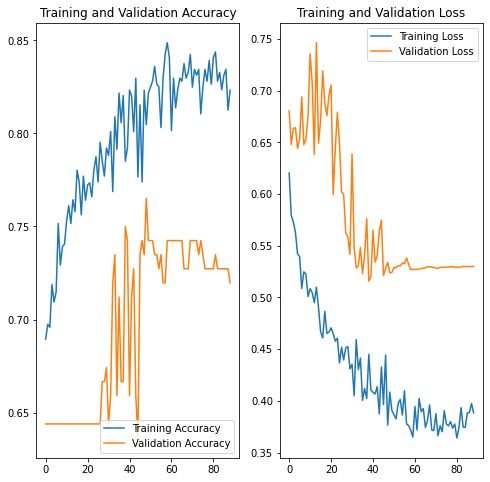

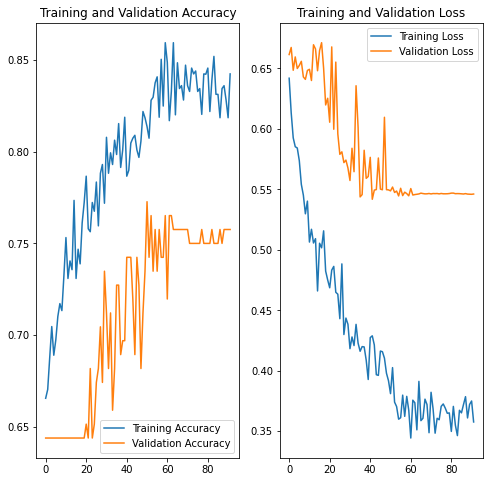

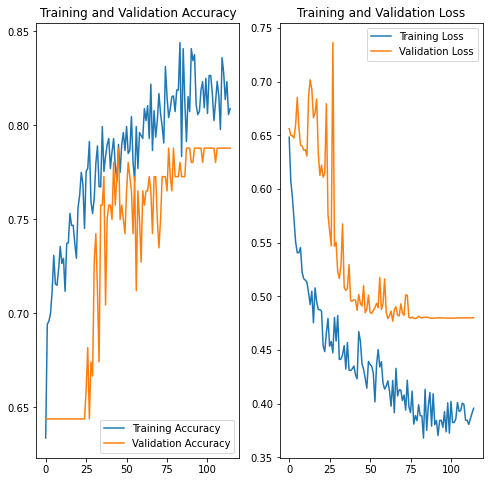

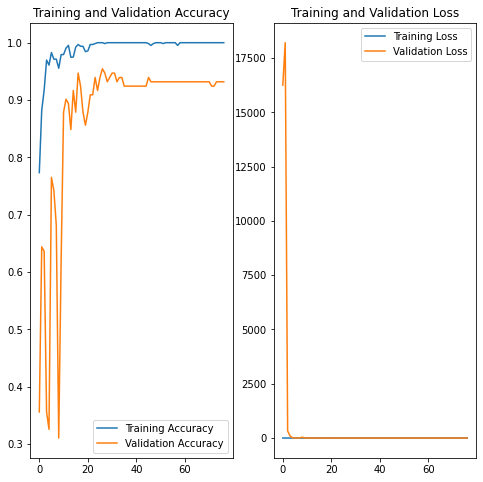

In [22]:
for model_fit in fit_list:
    acc = model_fit.history['accuracy']
    val_acc = model_fit.history['val_accuracy']

    loss=model_fit.history['loss']
    val_loss=model_fit.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

pred 1: [[0.1341996]]
pred 2: [[0.06820318]]
pred 3: [[0.00067077]]
pred 4: [[0.04615831]]

ensemble_4models: [[0.06230797]]
태극기입니다


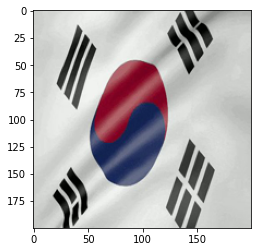

In [46]:
file_path = tf.keras.utils.get_file('test','https://acegif.com/wp-content/gifs/south-korea-flag-10-gap.jpg')
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)

print("pred 1:", pred1)
print("pred 2:", pred2)
print("pred 3:", pred3)
print("pred 4:", pred4)

pred = (pred1 + pred2 + pred3 + pred4) / 4

print("\nensemble_4models:", pred)

if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')

In [1]:
file_path = tf.keras.utils.get_file('test8','https://t1.daumcdn.net/cfile/tistory/230A724B54AF769F13') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)

print("resnet152:", pred1)
print("resnet50:", pred2)
print("inceptionv3:", pred3)
print("resnet101:", pred4)

pred = (pred1 + pred2 + pred3 + pred4) / 4

print("\nensemble_4models:", pred)

if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')

NameError: name 'tf' is not defined